In [ ]:
pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("cirrhosis.csv")

In [ ]:
df1

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


In [ ]:
df2

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [ ]:
df2.rename(columns={'ID': 'id'}, inplace=True)

In [ ]:
df = df1.append(df2)
#df = df1

<ipython-input-256-792faec9cf73>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


In [ ]:
df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0,D
414,415,1103,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0,C
415,416,1055,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0,C
416,417,691,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0,C


In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0,D
414,1103,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0,C
415,1055,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0,C
416,691,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0,C


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8318,681,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0,D
8319,1103,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0,C
8320,1055,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0,C
8321,691,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0,C


In [ ]:
df.columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status'],
      dtype='object')

In [ ]:
df.isna().sum()

N_Days             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
Status             0
dtype: int64

In [ ]:
df.dropna(axis=0, how='any', inplace=True)
df.isna().sum()

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [ ]:
df

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,1153,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0,C
8213,994,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0,C
8214,939,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0,C
8215,839,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0,C


In [ ]:
df_test = pd.read_csv("test.csv")
test_IDs = df_test.id
df_test = df_test.drop("id", axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
drug_le = LabelEncoder().fit(df['Drug'])
df['Drug'] = drug_le.transform(df['Drug'])
df_test['Drug'] = drug_le.transform(df_test['Drug'])

sex_le = LabelEncoder().fit(df['Sex'])
df['Sex'] = sex_le.transform(df['Sex'])
df_test['Sex'] = sex_le.transform(df_test['Sex'])

ascites_le = LabelEncoder().fit(df['Ascites'])
df['Ascites'] = ascites_le.transform(df['Ascites'])
df_test['Ascites'] = ascites_le.transform(df_test['Ascites'])

hepatomegaly_le = LabelEncoder().fit(df['Hepatomegaly'])
df['Hepatomegaly'] = hepatomegaly_le.transform(df['Hepatomegaly'])
df_test['Hepatomegaly'] = hepatomegaly_le.transform(df_test['Hepatomegaly'])

spiders_le = LabelEncoder().fit(df['Spiders'])
df['Spiders'] = spiders_le.transform(df['Spiders'])
df_test['Spiders'] = spiders_le.transform(df_test['Spiders'])

edema_le = LabelEncoder().fit(df['Edema'])
df['Edema'] = edema_le.transform(df['Edema'])
df_test['Edema'] = edema_le.transform(df_test['Edema'])

status_le = LabelEncoder().fit(df['Status'])
df['Status'] = status_le.transform(df['Status'])

In [ ]:
df

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,0,21532,1,0,0,0,0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,2
1,2574,1,19237,0,0,0,0,0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,0
2,3428,1,13727,0,0,1,1,2,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,2
3,2576,1,18460,0,0,0,0,0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,0
4,788,1,16658,0,0,1,0,0,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,1153,0,22347,0,0,1,0,0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0,0
8213,994,1,21294,0,0,0,0,0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0,0
8214,939,0,22767,0,0,0,0,0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0,0
8215,839,0,13879,0,0,0,0,0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0,0


In [ ]:
df['Status'].value_counts()

0    5112
2    2776
1     293
Name: Status, dtype: int64

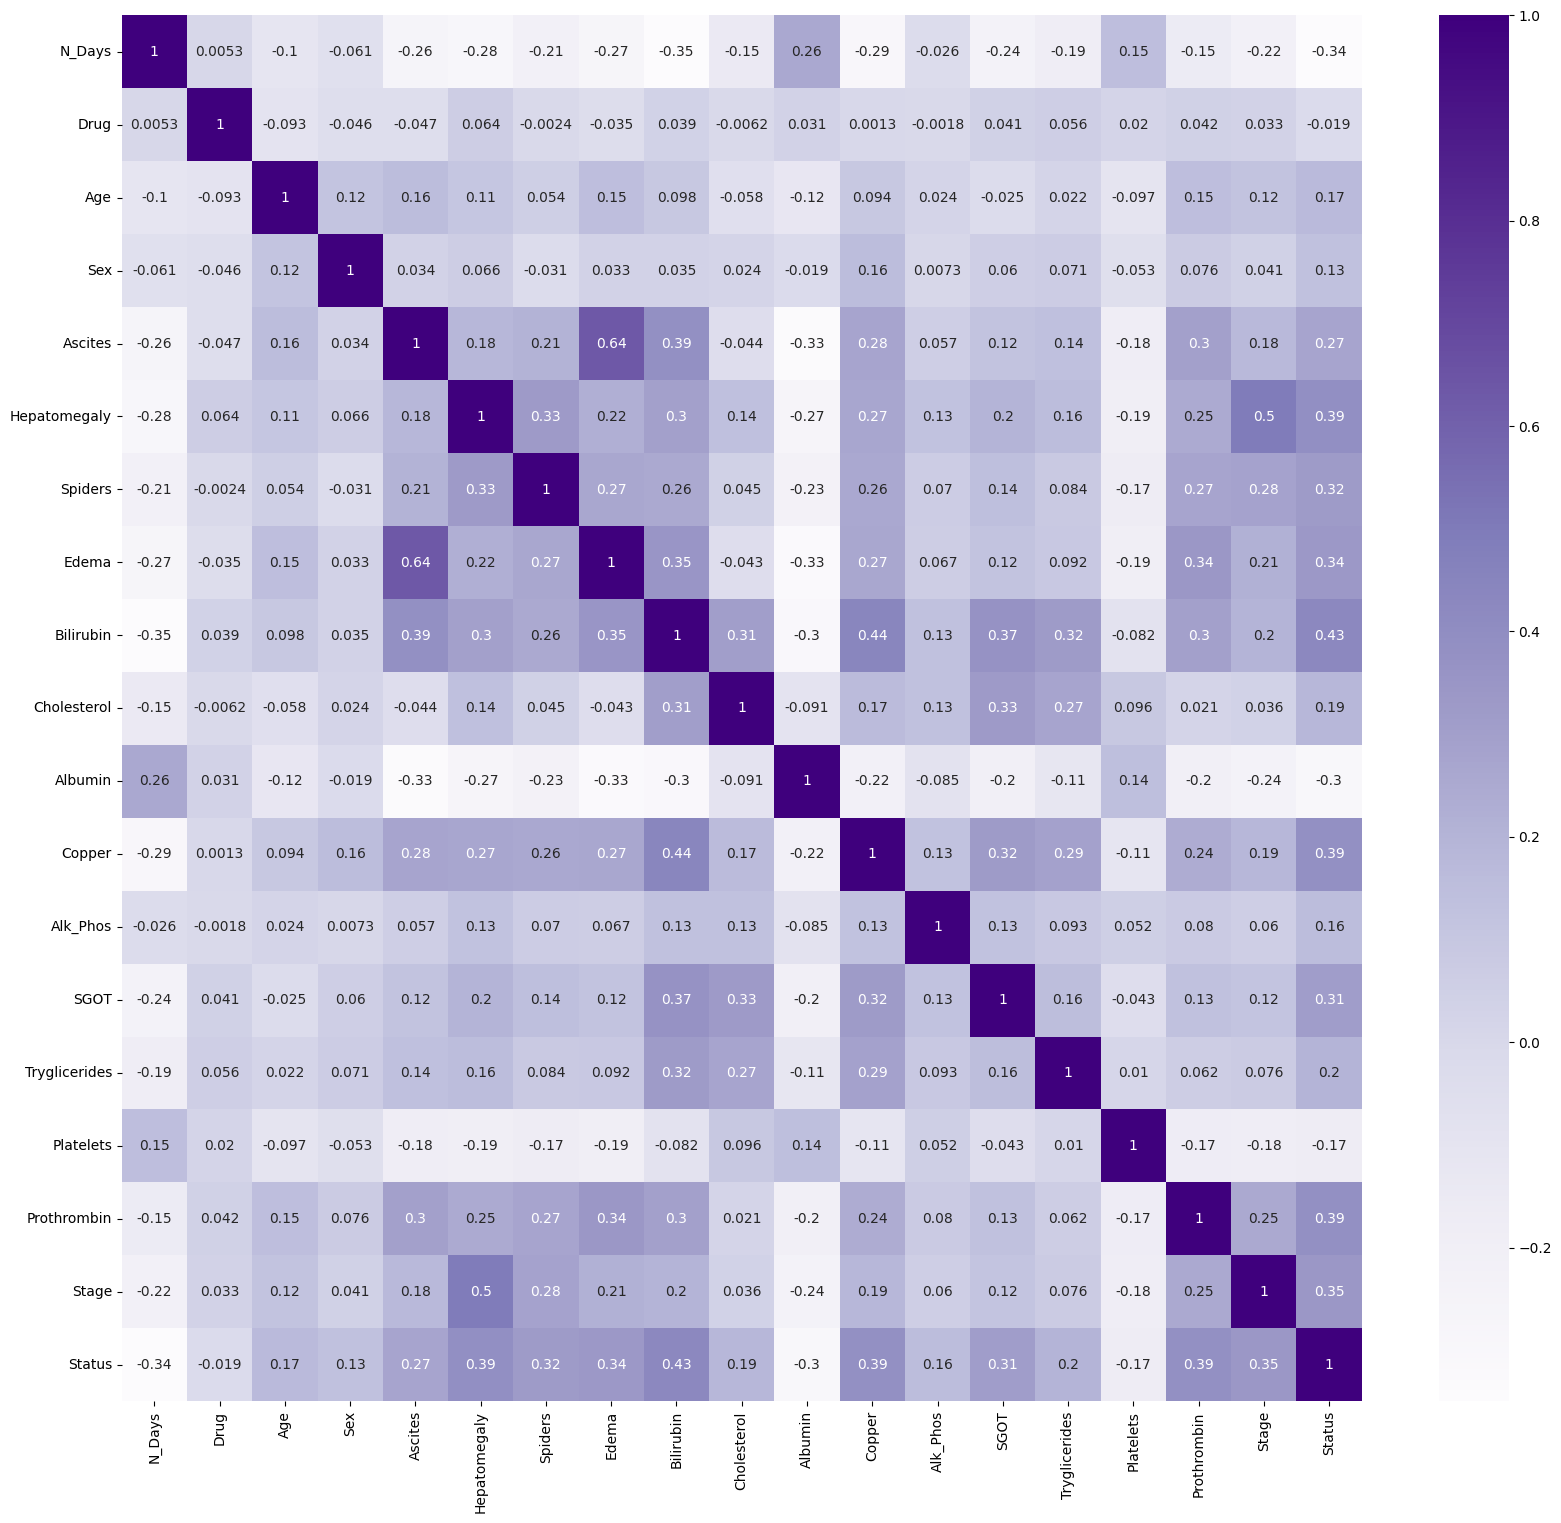

In [ ]:
plt.figure(figsize=(20,18))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Purples)
plt.show()

In [ ]:
cor_target = abs(cor["Status"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

N_Days           0.344967
Age              0.170017
Sex              0.133535
Ascites          0.274801
Hepatomegaly     0.392685
Spiders          0.321236
Edema            0.336796
Bilirubin        0.429771
Cholesterol      0.185468
Albumin          0.295322
Copper           0.386971
Alk_Phos         0.159669
SGOT             0.311983
Tryglicerides    0.199001
Platelets        0.170280
Prothrombin      0.387464
Stage            0.345782
Status           1.000000
Name: Status, dtype: float64

In [ ]:
df.columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status'],
      dtype='object')

In [ ]:
# df_afterfe=df[['N_Days', 'Age', 'Bilirubin', 'Albumin', 'Copper', 'Alk_Phos',
#        'SGOT', 'Platelets', 'Prothrombin', 'Status', 'Cholesterol', 'Tryglicerides', 'Stage', 'Drug', 'Sex']]
df_afterfe=df
# df_test_afterfe = df_test[['N_Days', 'Age', 'Bilirubin', 'Albumin', 'Copper', 'Alk_Phos',
      #  'SGOT', 'Platelets', 'Prothrombin', 'Cholesterol', 'Tryglicerides', 'Stage', 'Drug', 'Sex']]

In [ ]:
X = df_afterfe.drop("Status", axis=1)
y = df_afterfe["Status"]
print(X.shape)
print(y.shape)

(8181, 18)
(8181,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=100)
print("Training set size: {}".format(X_train.shape))
print("Testing set size: {}".format(X_test.shape))

Training set size: (7362, 18)
Testing set size: (819, 18)


In [ ]:
y_train.value_counts()

0    4595
2    2502
1     265
Name: Status, dtype: int64

In [ ]:
X_train

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
10,3581,1,25772,0,0,0,0,0,0.5,252.0,3.60,26.0,377.0,56.76,185.0,336.0,10.0,2.0
4548,1434,1,15119,0,0,1,1,0,4.7,259.0,3.57,121.0,705.0,196.85,101.0,214.0,11.0,3.0
7719,1435,1,22514,0,0,1,0,0,3.4,325.0,3.56,32.0,1664.0,116.25,118.0,217.0,10.2,3.0
3854,1152,0,22347,0,0,0,0,0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,3.0
2175,939,1,13879,1,0,0,0,0,1.0,259.0,3.57,39.0,2201.0,128.65,64.0,271.0,10.2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3927,2576,0,17323,0,0,0,0,0,1.2,174.0,3.83,59.0,976.0,125.55,96.0,221.0,10.3,3.0
8058,140,0,25340,1,0,0,1,2,2.4,168.0,2.56,225.0,1056.0,120.90,75.0,108.0,14.1,3.0
5955,1418,0,14191,0,0,0,0,0,1.0,1436.0,3.50,74.0,1082.0,141.05,108.0,217.0,9.9,2.0
6936,2504,1,16094,0,0,0,1,0,0.5,120.0,3.61,53.0,804.0,110.05,52.0,110.0,11.0,3.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']] = scaler.fit_transform(X_train[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']])
X_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']] = scaler.transform(X_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']])
df_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']] = scaler.transform(df_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']])
X_train.sort_index()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0.201515,0,0.626391,1,0,0,0,0,0.072202,0.118429,0.518657,0.287671,0.096660,0.356115,0.053097,0.662675,0.077778,3.0
1,0.532814,1,0.505931,0,0,0,0,0,0.021661,0.147432,0.589552,0.101027,0.084798,0.251799,0.097345,0.596806,0.222222,3.0
2,0.712453,1,0.216723,0,0,1,1,2,0.108303,0.108157,0.593284,0.217466,0.054518,0.215827,0.030088,0.273453,0.300000,4.0
3,0.533235,1,0.465148,0,0,0,0,0,0.010830,0.082175,0.574627,0.092466,0.100491,0.104317,0.111504,0.413174,0.188889,3.0
4,0.157131,1,0.370565,0,0,1,0,0,0.028881,0.136556,0.630597,0.101027,0.065717,0.230216,0.111504,0.471058,0.177778,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,0.233908,0,0.669169,0,0,1,0,0,0.003610,0.076133,0.604478,0.034247,0.037426,0.150035,0.141593,0.451098,0.155556,2.0
8213,0.200463,1,0.613899,0,0,0,0,0,0.003610,0.084592,0.294776,0.063356,0.064612,0.101300,0.086726,0.337325,0.200000,2.0
8214,0.188894,0,0.691214,0,0,0,0,0,0.050542,0.189728,0.518657,0.059932,0.104911,0.335693,0.118584,0.343313,0.133333,2.0
8215,0.167859,0,0.224701,0,0,0,0,0,0.061372,0.076737,0.447761,0.111301,0.056066,0.210374,0.097345,0.544910,0.166667,2.0


In [ ]:
print(y_train.value_counts())

0    4595
2    2502
1     265
Name: Status, dtype: int64


In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state = 42)
X_train_ada, y_train_ada = ada.fit_resample(X_train,y_train)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 60)
X_train_sm, y_train_sm = sm.fit_resample(X_train,y_train)

In [ ]:
from imblearn.combine import SMOTETomek
smtom = SMOTETomek(random_state = 50)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train,y_train)

In [ ]:
from imblearn.combine import SMOTEENN
smenn = SMOTEENN(random_state = 55)
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train,y_train)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto',random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)

In [ ]:
print(y_train_ada.value_counts())

0    4595
1    4595
2    4488
Name: Status, dtype: int64


In [ ]:
print(y_train_smtom.value_counts())

1    4592
2    4456
0    4455
Name: Status, dtype: int64


In [ ]:
print(y_train_smenn.value_counts())

1    4532
2    3091
0    2410
Name: Status, dtype: int64


In [ ]:
print(y_train_sm.value_counts())

0    4595
2    4595
1    4595
Name: Status, dtype: int64


In [ ]:
#X_train,y_train = X_train_ada, y_train_ada
#X_train,y_train = X_train_smtom, y_train_smtom
#X_train,y_train = X_train_smenn, y_train_smenn
#X_train,y_train = X_train_sm, y_train_sm
#X_train,y_train = X_train_ros, y_train_ros

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

score_log = pd.DataFrame()
def score(model, name , x_test, y_test, position):
    y_pred = model.predict(x_test)
    y_pred = y_pred.reshape(-1,)
    compare_results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
    print("Confusion matrix: \n",confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(compare_results)
    score_log.loc[position, "Model"] = name
    score_log.loc[position, "Accuracy"] = round(accuracy_score(y_test, y_pred), 2)
    score_log.loc[position, "Precision"] = round(precision_score(y_test, y_pred, average='weighted'), 2)
    score_log.loc[position, "Recall"] = round(recall_score(y_test, y_pred, average='weighted'), 2)
    score_log.loc[position, "F1-Score"] = round(f1_score(y_test, y_pred, average='weighted'), 2)
    return score_log

submission_labels = ["Status_C", "Status_CL", "Status_D"]
sub = pd.DataFrame()
def submission_file(model):
  submission_predictions = model.predict_proba(df_test)
  sub = pd.DataFrame({"id": test_IDs, **dict(zip(submission_labels, submission_predictions.T))})
  return sub

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier(n_neighbors = 5, p = 3, metric='minkowski')
KNN_Classifier.fit(X_train, y_train)
print(score(KNN_Classifier,"KNN Classifier", X_test, y_test, 1))

Confusion matrix: 
 [[456   1  60]
 [ 18   2   8]
 [124   1 149]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       517
           1       0.50      0.07      0.12        28
           2       0.69      0.54      0.61       274

    accuracy                           0.74       819
   macro avg       0.65      0.50      0.52       819
weighted avg       0.73      0.74      0.72       819

      Actual  Predicted
2934       2          2
2756       2          0
411        0          0
6479       0          0
3479       0          0
...      ...        ...
133        0          0
2160       0          0
7853       0          0
1229       0          0
490        0          0

[819 rows x 2 columns]
            Model  Accuracy  Precision  Recall  F1-Score
1  KNN Classifier      0.74       0.73    0.74      0.72


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
print(score(model,"Gaussian Naive Bayes", X_test, y_test, 2))

Confusion matrix: 
 [[463  13  41]
 [ 18   3   7]
 [122  15 137]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       517
           1       0.10      0.11      0.10        28
           2       0.74      0.50      0.60       274

    accuracy                           0.74       819
   macro avg       0.54      0.50      0.51       819
weighted avg       0.74      0.74      0.73       819

      Actual  Predicted
2934       2          2
2756       2          2
411        0          0
6479       0          0
3479       0          0
...      ...        ...
133        0          0
2160       0          0
7853       0          0
1229       0          0
490        0          2

[819 rows x 2 columns]
(                  Model  Accuracy  Precision  Recall  F1-Score
1        KNN Classifier      0.75       0.74    0.75      0.74
2  Gaussian Naive Bayes      0.74       0.74    0.74      0.73,          id      Status_C     Status_CL      Statu

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model_bernoulli=BernoulliNB()
model_bernoulli.fit(X_train,y_train)
print(score(model_bernoulli,"Bernoulli Naive Bayes", X_test, y_test, 3))

Confusion matrix: 
 [[449   0  68]
 [ 20   0   8]
 [131   0 143]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       517
           1       0.00      0.00      0.00        28
           2       0.65      0.52      0.58       274

    accuracy                           0.72       819
   macro avg       0.47      0.46      0.46       819
weighted avg       0.69      0.72      0.70       819

      Actual  Predicted
2934       2          2
2756       2          0
411        0          0
6479       0          0
3479       0          0
...      ...        ...
133        0          0
2160       0          0
7853       0          0
1229       0          0
490        0          0

[819 rows x 2 columns]
(                   Model  Accuracy  Precision  Recall  F1-Score
1         KNN Classifier      0.75       0.74    0.75      0.74
2   Gaussian Naive Bayes      0.74       0.74    0.74      0.73
3  Bernoulli Naive Bayes      0.72       0.69   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)
print(score(model,"SVC", X_test, y_test, 4))

Confusion matrix: 
 [[475   0  42]
 [ 15   0  13]
 [108   0 166]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       517
           1       0.00      0.00      0.00        28
           2       0.75      0.61      0.67       274

    accuracy                           0.78       819
   macro avg       0.52      0.51      0.51       819
weighted avg       0.75      0.78      0.76       819

      Actual  Predicted
2934       2          2
2756       2          2
411        0          0
6479       0          0
3479       0          0
...      ...        ...
133        0          0
2160       0          0
7853       0          0
1229       0          0
490        0          0

[819 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

AttributeError: ignored

In [ ]:
from sklearn import svm
parameters = {'kernel':('linear','poly','rbf'), 'C':[1, 10]}
svc = svm.SVC()
svc_grid_cv = GridSearchCV(svc,parameters)
svc_grid_cv.fit(X_train,y_train)
print(svc_grid_cv.best_params_)
print(score(svc_grid_cv,"Grid Search SVC", X_test, y_test, 5))

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
print(score(logmodel,"Logistic Regression", X_test, y_test, 6))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 250, criterion = 'entropy', max_depth = 20, random_state = 0)
classifier.fit(X_train, y_train)
print(score(classifier,"Random Forest Classifier", X_test, y_test, 7))
sorted_idx = classifier.feature_importances_.argsort()
plt.barh(df_afterfe.columns[sorted_idx], classifier.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
parameters = {'n_estimators': [250], 'criterion':('gini','entropy'),  'max_depth':[10,13,15,18,20,25]}
rfc = RandomForestClassifier(random_state = 0)
rfc_grid_cv = GridSearchCV(rfc,parameters)
rfc_grid_cv.fit(X_train,y_train)
print(rfc_grid_cv.best_params_)
print(score(rfc_grid_cv,"Grid Search Random Forest Classfier", X_test, y_test, 8))
sorted_idx = rfc_grid_cv.best_estimator_.feature_importances_.argsort()
plt.barh(df_afterfe.columns[sorted_idx], rfc_grid_cv.best_estimator_.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators = 100, max_depth = 30, min_child_weight = 9, learning_rate = 0.6)
xgb.fit(X_train,y_train)
print(score(xgb,"XGBoost Classfier", X_test, y_test, 9))
from xgboost import plot_importance
plot_importance(xgb)

In [ ]:
parameters = {'n_estimators': [100, 110, 120, 130], 'max_depth':[20,25,30,35,40,45], 'min_child_weight':[6,7,8,9,10]}
xgb = XGBClassifier()
xgb_grid_cv = GridSearchCV(xgb,parameters)
xgb_grid_cv.fit(X_train,y_train)
print(xgb_grid_cv.best_params_)
print(score(xgb_grid_cv,"Grid Search XGBoost Classfier", X_test, y_test, 10))

In [ ]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train,y_train)
print(score(catboost_model,"Catboost Classfier Default", X_test, y_test, 15))

Learning rate set to 0.087607
0:	learn: 1.0140317	total: 31.6ms	remaining: 31.6s
1:	learn: 0.9445774	total: 43.5ms	remaining: 21.7s
2:	learn: 0.8833531	total: 66.9ms	remaining: 22.2s
3:	learn: 0.8345537	total: 88.6ms	remaining: 22.1s
4:	learn: 0.7927004	total: 114ms	remaining: 22.6s
5:	learn: 0.7559079	total: 127ms	remaining: 21.1s
6:	learn: 0.7245372	total: 139ms	remaining: 19.7s
7:	learn: 0.6975182	total: 152ms	remaining: 18.8s
8:	learn: 0.6730451	total: 165ms	remaining: 18.1s
9:	learn: 0.6517910	total: 183ms	remaining: 18.1s
10:	learn: 0.6324833	total: 210ms	remaining: 18.9s
11:	learn: 0.6153247	total: 230ms	remaining: 18.9s
12:	learn: 0.6001190	total: 252ms	remaining: 19.2s
13:	learn: 0.5869574	total: 274ms	remaining: 19.3s
14:	learn: 0.5757988	total: 295ms	remaining: 19.4s
15:	learn: 0.5646012	total: 319ms	remaining: 19.6s
16:	learn: 0.5551642	total: 333ms	remaining: 19.2s
17:	learn: 0.5467430	total: 344ms	remaining: 18.8s
18:	learn: 0.5390417	total: 356ms	remaining: 18.4s
19:	lea

In [ ]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=500,
                                    depth=6,
                                    learning_rate=0.6,
                                    loss_function='MultiClass',
                                    random_state=42,
                                    verbose=100)
catboost_model.fit(X_train,y_train)
print(score(catboost_model,"Catboost Classfier", X_test, y_test, 11))

0:	learn: 0.6723800	total: 18.5ms	remaining: 9.21s
100:	learn: 0.2404763	total: 1.95s	remaining: 7.7s
200:	learn: 0.1416336	total: 3.68s	remaining: 5.47s
300:	learn: 0.0924001	total: 4.6s	remaining: 3.04s
400:	learn: 0.0645239	total: 5.5s	remaining: 1.36s
499:	learn: 0.0486009	total: 6.4s	remaining: 0us
Confusion matrix: 
 [[465   1  51]
 [ 12   3  13]
 [ 79   1 194]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       517
           1       0.60      0.11      0.18        28
           2       0.75      0.71      0.73       274

    accuracy                           0.81       819
   macro avg       0.73      0.57      0.59       819
weighted avg       0.80      0.81      0.80       819

      Actual  Predicted
2934       2          2
2756       2          2
411        0          0
6479       0          0
3479       0          0
...      ...        ...
133        0          0
2160       0          0
7853       0          0
1229    

In [ ]:
parameters = {'max_depth': [4,6,8,10],'n_estimators':[100, 200, 300], 'learning_rate' :[0.4,0.45,0.5,0.55,0.6,0.65]}
catboost_model = CatBoostClassifier(loss_function='MultiClass',
                                    random_state=42,
                                    verbose=100)
catboost_grid_cv = GridSearchCV(catboost_model,parameters)
catboost_grid_cv.fit(X_train,y_train)
print(catboost_grid_cv.best_params_)
print(score(catboost_grid_cv,"Grid Search Catboost Classfier", X_test, y_test, 13))

0:	learn: 0.7840410	total: 12.1ms	remaining: 1.2s
99:	learn: 0.3597088	total: 1.17s	remaining: 0us
0:	learn: 0.7897372	total: 11.4ms	remaining: 1.12s
99:	learn: 0.3467886	total: 667ms	remaining: 0us
0:	learn: 0.7834739	total: 10.7ms	remaining: 1.06s
99:	learn: 0.3589456	total: 741ms	remaining: 0us
0:	learn: 0.7764619	total: 4.61ms	remaining: 456ms
99:	learn: 0.3455803	total: 775ms	remaining: 0us
0:	learn: 0.7837824	total: 4.79ms	remaining: 474ms
99:	learn: 0.3509061	total: 889ms	remaining: 0us
0:	learn: 0.7840410	total: 9.25ms	remaining: 1.84s
100:	learn: 0.3588683	total: 639ms	remaining: 626ms
199:	learn: 0.3007288	total: 1.04s	remaining: 0us
0:	learn: 0.7897372	total: 4.51ms	remaining: 898ms
100:	learn: 0.3460932	total: 423ms	remaining: 414ms
199:	learn: 0.2838638	total: 826ms	remaining: 0us
0:	learn: 0.7834739	total: 4.56ms	remaining: 908ms
100:	learn: 0.3569368	total: 421ms	remaining: 413ms
199:	learn: 0.2923237	total: 826ms	remaining: 0us
0:	learn: 0.7764619	total: 11.2ms	remainin

In [ ]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(20),verbose=10,
                    learning_rate_init=0.5, max_iter=2000,
                    activation='logistic', solver='sgd', shuffle=True, random_state=30)

mlpc.fit(X_train,y_train)
print(score(mlpc,"Multilayer Perceptron Classfier", X_test, y_test, 12))

Iteration 1, loss = 0.96738525
Iteration 2, loss = 0.83701406
Iteration 3, loss = 0.79501065
Iteration 4, loss = 0.79178433
Iteration 5, loss = 0.76810350
Iteration 6, loss = 0.76425114
Iteration 7, loss = 0.75639420
Iteration 8, loss = 0.74633648
Iteration 9, loss = 0.74398654
Iteration 10, loss = 0.73282240
Iteration 11, loss = 0.73729094
Iteration 12, loss = 0.72687680
Iteration 13, loss = 0.72309620
Iteration 14, loss = 0.71281380
Iteration 15, loss = 0.71900768
Iteration 16, loss = 0.70641543
Iteration 17, loss = 0.70503993
Iteration 18, loss = 0.70521445
Iteration 19, loss = 0.69339990
Iteration 20, loss = 0.69680518
Iteration 21, loss = 0.68554063
Iteration 22, loss = 0.68656645
Iteration 23, loss = 0.68523741
Iteration 24, loss = 0.68634156
Iteration 25, loss = 0.68464190
Iteration 26, loss = 0.68056302
Iteration 27, loss = 0.68194795
Iteration 28, loss = 0.67138436
Iteration 29, loss = 0.67039907
Iteration 30, loss = 0.66988791
Iteration 31, loss = 0.66610267
Iteration 32, los

In [ ]:
score_log

,Model,Accuracy,Precision,Recall,F1-Score
1,KNN Classifier,0.64,0.72,0.64,0.67
11,Catboost Classfier,0.79,0.80,0.79,0.80
12,Multilayer Perceptron Classfier,0.78,0.79,0.78,0.78


In [ ]:
submission_file(catboost_grid_cv).to_csv('submission.csv', index=False)

In [ ]:
}